#### Santiago Benito Ibáñez, 1706979      
#### Diego Aarón Mostiga Mostiga, 1708231

# Predicción de venta de videojuegos

### 1. Introducción

La industria del videojuego ha sido una de las industrias de entretenimiento que más ha estado en auge en las últimas décadas, haciendo que los géneros y estilos de juegos hayan aumentado considerablemente.

En este Jupyter notebook vamos a intentar predecir que factores son los más importantes para que un videojuego tenga buenas ventas.

Todos los datos relacionados con este estudio se pueden encontrar en el siguiente enlace: https://www.kaggle.com/datasets/alyahmedts13/top-pc-games-metacritic-vs-steam-popularity/data?select=steam_spy_data.csv.

El repositorio del GitHub está en el siguiente enlace https://github.com/NNIU1708231/APC_kaggle

### 2. Atributos de nuestra base de datos

- Name: Nombre del videojuego.
- Platform: Plataforma en la que el juego salió por primera vez.
- Year_Of_Release: Año en el que salió el juego.
- Genre: Género del videojuego.
- Publisher: Nombre de la compañía que sacó el juego en Steam.
- NA_Sales, EU_Sales... : Número de ventas por región, está en unidades de millón.
- Global_Sales: Número de ventas globales, es la suma de todas las ventas regionales.
- Critic_Score: Puntuación dada al juego por parte de Metacritic, página web que recopila y promedia las reseñas profesionales.
- Critic_Count: Número de críticos que han sido tenidos en cuenta para el Critic_Score.
- User_Score: Puntuación dada por los usuarios de Metacritic.
- User_Count: Número de usuarios que han sido tenidos en cuenta para el User_Count.
- Developer: Nombre de la compañía que desarrolló el juego.
- Rating: Rating ESRB dado al juego, es la clasificación que decide a partir de qué edad se puede jugar al videojuego.

### 3. Dependencias
Estas son las librerías que hemos usado para nuestro análisis del dataset:
- Pandas y Numpy: Todas las operaciones de vectores de datos y matrices.
- Matplotlib y Seaborn: Nos ayuda a crear los gráficos para visualizar la información.
- Scipy: Ayuda con el tema de las estadísticas.
- Sklearn: Nos ofrece todo lo necesario para poder entrenar y testear los modelos.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score


### 4. Información de la data
Antes de empezar con el análisi de nuestro dataset, vamos a explorar nuestra data para ver con que vamos a tratar.

In [51]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("\nFASE 1: ANÁLISIS EXPLORATORIO DE DATOS")
print("-"*50)

df = pd.read_csv(r"C:\Users\omega\Downloads\archive\dataset.csv", engine='python', on_bad_lines='skip')
print(f"Número de videojuegos: {len(df)}")
print(f"Número de atributos por videojuego: {len(df.columns)}")


FASE 1: ANÁLISIS EXPLORATORIO DE DATOS
--------------------------------------------------
Número de videojuegos: 16719
Número de atributos por videojuego: 16


Como vemos aquí, nuestro dataset consta de 16719 videojuegos y con 16 atributos por cada uno de ellos.
Vamos a ver unos ejemplos:

In [52]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Como podemos ver en el ejemplo de arriba, es posible que algunos videojuegos tengan atributos nulos, vamos a tratar con ellos.

In [53]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Vamos a crear una copia del dataset que será el que analizaremos y entrenaremos durante todo este proceso. 

In [54]:
df_analysis = df.copy()

Podemos observar que en este dataset hay bastantes valores nulos, así que solucionemos esto.

In [55]:

# Convertir User_Score a numérico
df_analysis['User_Score'] = pd.to_numeric(df_analysis['User_Score'], errors='coerce')

# Imputar valores nulos para análisis (no para modelo)
df_analysis['Critic_Score'] = df_analysis['Critic_Score'].fillna(df_analysis['Critic_Score'].median())
df_analysis['User_Score'] = df_analysis['User_Score'].fillna(df_analysis['User_Score'].median())
df_analysis['Year_of_Release'] = df_analysis['Year_of_Release'].fillna(df_analysis['Year_of_Release'].median())

# Crear características derivadas para análisis
df_analysis['Total_Sales_Calculated'] = df_analysis[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
df_analysis['Score_Diff'] = df_analysis['Critic_Score'] - df_analysis['User_Score'] * 10
df_analysis['Review_Count_Total'] = df_analysis['Critic_Count'] + df_analysis['User_Count']

In [56]:
df_analysis.info()
df_analysis.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    16717 non-null  object 
 1   Platform                16719 non-null  object 
 2   Year_of_Release         16719 non-null  float64
 3   Genre                   16717 non-null  object 
 4   Publisher               16665 non-null  object 
 5   NA_Sales                16719 non-null  float64
 6   EU_Sales                16719 non-null  float64
 7   JP_Sales                16719 non-null  float64
 8   Other_Sales             16719 non-null  float64
 9   Global_Sales            16719 non-null  float64
 10  Critic_Score            16719 non-null  float64
 11  Critic_Count            8137 non-null   float64
 12  User_Score              16719 non-null  float64
 13  User_Count              7590 non-null   float64
 14  Developer               10096 non-null

Name                         2
Platform                     0
Year_of_Release              0
Genre                        2
Publisher                   54
NA_Sales                     0
EU_Sales                     0
JP_Sales                     0
Other_Sales                  0
Global_Sales                 0
Critic_Score                 0
Critic_Count              8582
User_Score                   0
User_Count                9129
Developer                 6623
Rating                    6769
Total_Sales_Calculated       0
Score_Diff                   0
Review_Count_Total        9702
dtype: int64

Con esto, hemos conseguido eliminar bastantes valores nulos de nuestro dataset.

### 5. Análisis de los datos
Una vez hemos visto con que estamos tratando, vamos a empezar con el análisis del dataset.

Como tenemos tantos atributos por videojuego, vamos a ver las correlaciones entre estos.


Calculando correlaciones entre variables...


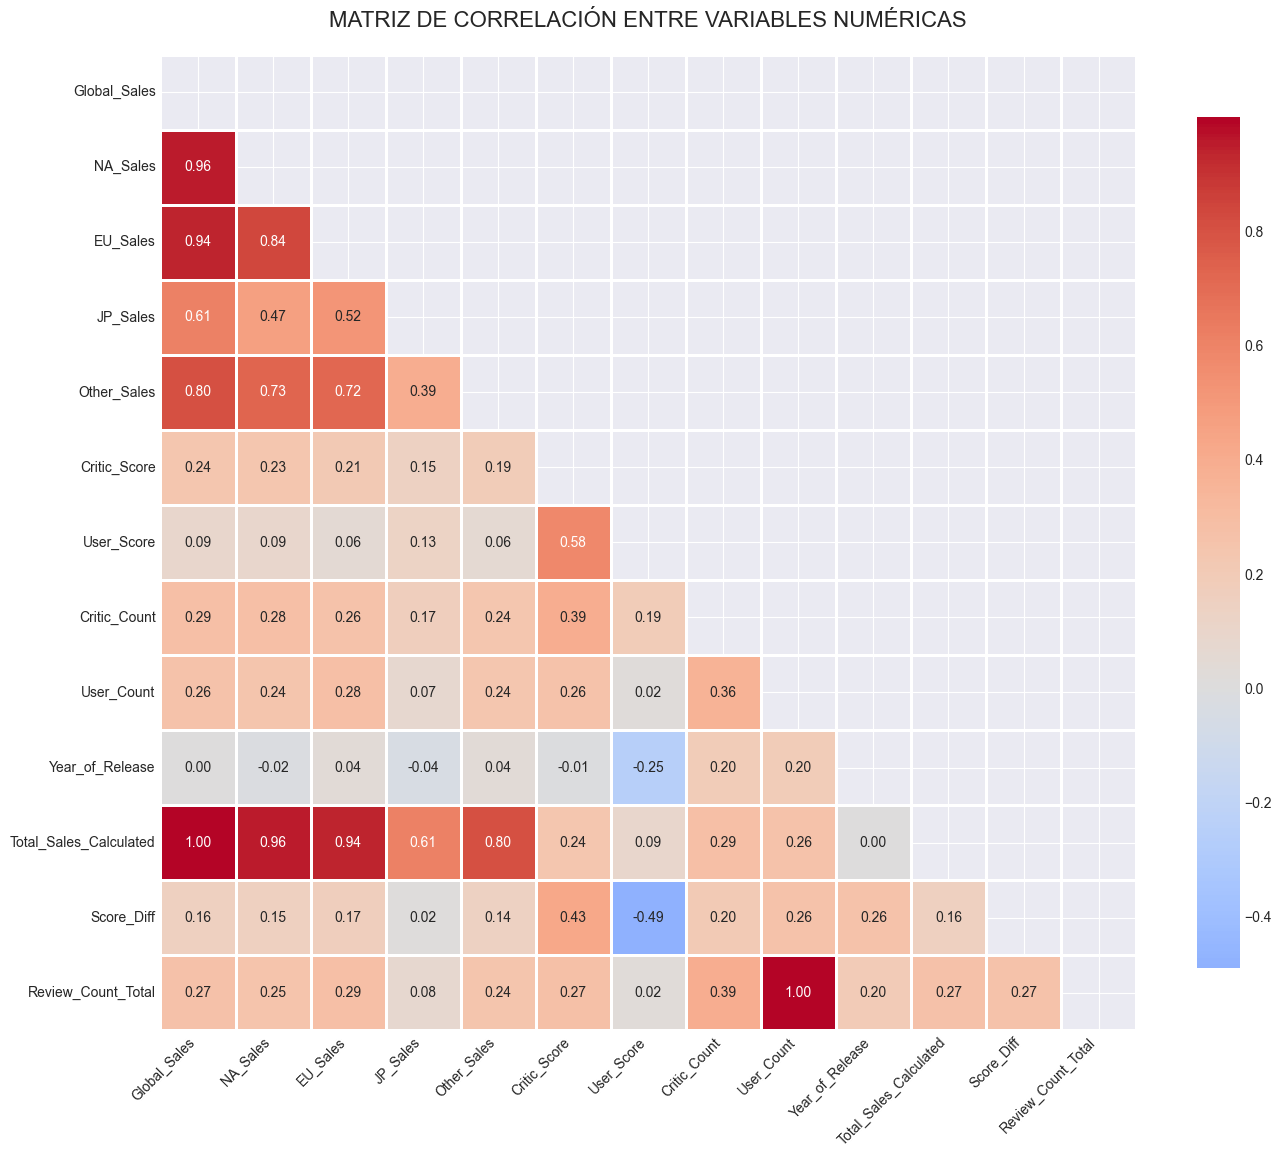

In [57]:
print("\nCalculando correlaciones entre variables...")

numeric_cols = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
                'Critic_Score', 'User_Score', 'Critic_Count', 'User_Count',
                'Year_of_Release', 'Total_Sales_Calculated', 'Score_Diff', 'Review_Count_Total']

df_numeric = df_analysis[numeric_cols].dropna()
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})

plt.title('MATRIZ DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Vamos a ver entonces, cuáles correlaciones son las más importantes:


Visualizando relaciones más importantes...


C:\Users\omega\AppData\Local\Temp\ipykernel_14552\282961885.py:36: UserWarning:

Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) Arial.

c:\Users\omega\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) Arial.



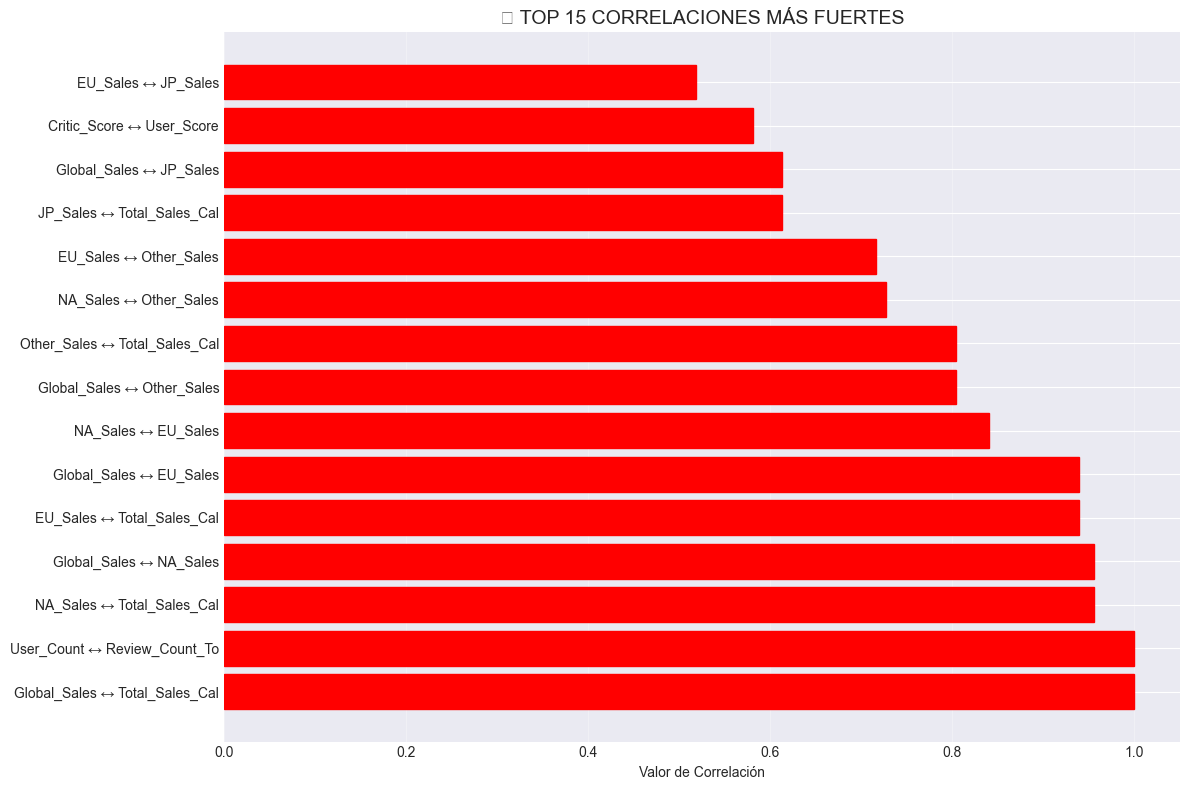

In [58]:
print("\nVisualizando relaciones más importantes...")

threshold = 0.3
strong_correlations = []

for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > threshold:
            strong_correlations.append({
                'Variable1': numeric_cols[i],
                'Variable2': numeric_cols[j],
                'Correlación': corr,
                'Abs_Corr': abs(corr)
            })

corr_df = pd.DataFrame(strong_correlations).sort_values('Abs_Corr', ascending=False)

plt.figure(figsize=(12, 8))
top_correlations = corr_df.head(15).copy()
top_correlations['Label'] = top_correlations.apply(
    lambda x: f"{x['Variable1'][:15]} ↔ {x['Variable2'][:15]}", axis=1)

bars = plt.barh(range(len(top_correlations)), top_correlations['Correlación'].values)
plt.yticks(range(len(top_correlations)), top_correlations['Label'].values)

for i, bar in enumerate(bars):
    if top_correlations.iloc[i]['Correlación'] > 0:
        bar.set_color('red')
    else:
        bar.set_color('blue')

plt.xlabel('Valor de Correlación')
plt.title('🔝 TOP 15 CORRELACIONES MÁS FUERTES', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

De esto podemos sacar que hay muchas correlaciones extremadamente fuertes, debido a que tenemos muchas por encima del 0.6 e incluso del 0.8, además, la mayoría son correlaciones entre ventas regionales.

La mayoría de las mejores correlaciones involucran al atributo Total_Sales_Cal con el atributo pertinente a la venta de una región, esto es debido a que son matemáticamente dependientes (Total_Sales_Cal = NA_Sales + EU_Sales + Other_Sales...), debido a esto, llegamos a la conclusión de que estas correlaciones no nos aportan ninguna información nueva sobre el fenómeno.

La mayoría de las demás correlaciones fuertes son las que involucran dos atributos de ventas regionales (NA_Sales <-> EU_SALES por ejemplo), esto es esperable, debido a que si un juego vende bien en una región, suele hacerlo también en las demás, dicho esto, estas correlaciones indican que las ventas regionales son las variables más explicativas del dataset.

También podemos ver la correlación Critic_Score <-> User_Score, indicando que un juego que gusta a la crítica suele gustar al público, aun así, vemos que los atributos de score se relacionan más entre sí que con las ventas, indicando que la crítica no es una garantía directa del éxito comercial.

Ahora que hemos estudiado las correlaciones de las variables, vamos a visualizar las ventas de los videojuegos dependiendo de los atributos categóricos, es decir, la plataforma, el género y el rating.


Analizando variables categóricas...


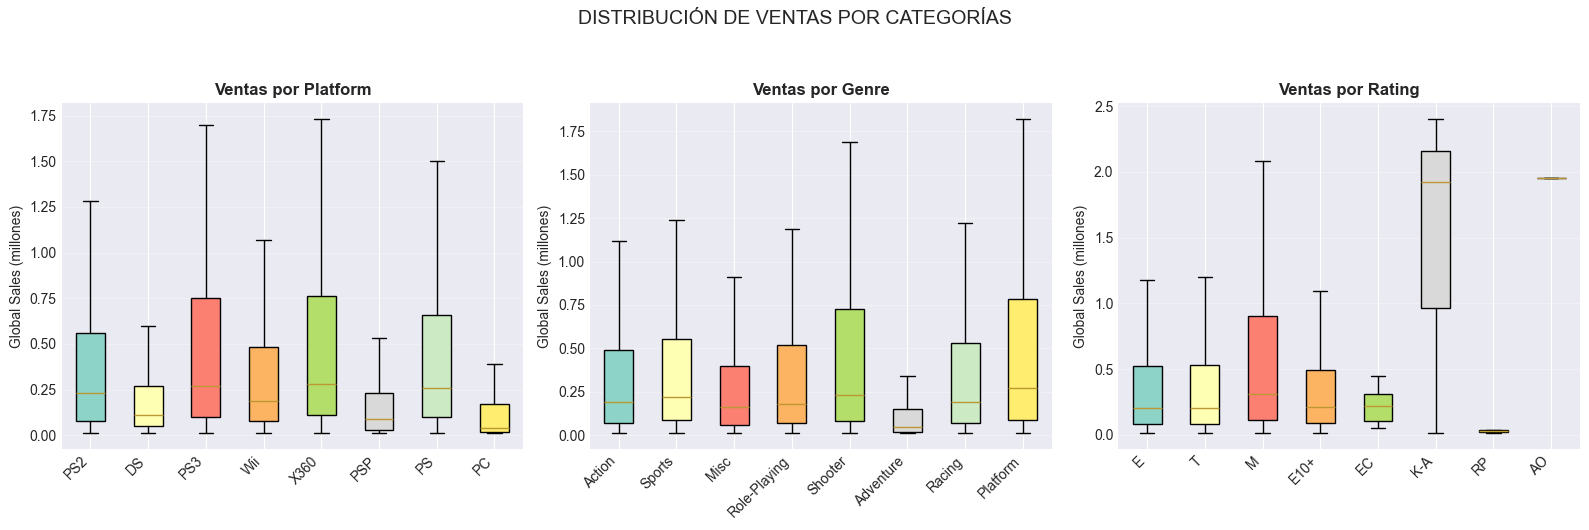

In [59]:
print("\nAnalizando variables categóricas...")

categorical_vars = ['Platform', 'Genre', 'Rating']
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, cat_var in enumerate(categorical_vars):
    ax = axes[idx]
    
    top_categories = df_analysis[cat_var].value_counts().head(8).index
    data_filtered = df_analysis[df_analysis[cat_var].isin(top_categories)]
    
    box_data = [data_filtered[data_filtered[cat_var] == cat]['Global_Sales'].values 
                for cat in top_categories]
    
    bp = ax.boxplot(box_data, patch_artist=True, showfliers=False)
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(top_categories)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_xticklabels([str(cat)[:12] for cat in top_categories], rotation=45, ha='right')
    ax.set_ylabel('Global Sales (millones)')
    ax.set_title(f'Ventas por {cat_var}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('DISTRIBUCIÓN DE VENTAS POR CATEGORÍAS', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

Aquí podemos observar distintas cosas dependiendo del atributo:
- Plataforma: Aquí podemos observar que las plataformas con mayor media de ventas son PS3, X360 y PS y la que menor media de ventas tiene son DS, PSP y PC, llegando a la conclusión de que los juegos de plataformas domésticas son más vendidos que los juegos de PC y consolas portátiles.

- Género: En el gráfico de las ventas por género vemos que los juegos con mayor media de ventas globales son los de género plataforma, shooter y deportivos, mientras que los juegos menos vendidos son los de género aventura.

- Rating: Vemos que en este gráfico sin ninguna duda los juegos más vendidos son los que tienen un rating K-A, pero tenemos que tener en cuenta que hay muy pocos juegos que sean de rating K-A en el dataset, haciendo que la media sea alta debido a unos pocos éxitos, si nos fijamos en las que tienen más datos, los juegos más vendidos son los que tienen rating M, E10+ y EC.

Sin embargo, tenemos que tener en cuenta que algunas categorías contienen muy pocas observaciones, como es el caso visto con el rating K-A.

Una vez hemos analizado nuestro dataset, vamos a ver un resumen:

In [60]:
print("\n" + "="*60)
print("INSIGHTS DEL ANÁLISIS EXPLORATORIO")
print("="*60)

print("\nTOP 5 CORRELACIONES CON GLOBAL_SALES:")
top_positive = correlation_matrix['Global_Sales'].sort_values(ascending=False).head(6)
for i, (var, corr) in enumerate(top_positive.items()):
    if var != 'Global_Sales':
        strength = "FUERTE" if abs(corr) > 0.7 else "MODERADA" if abs(corr) > 0.3 else "DÉBIL"
        print(f"  {i}. {var:25} : {corr:.4f} ({strength})")

print("\nTOP PLATAFORMAS POR VENTAS:")
platform_stats = df_analysis.groupby('Platform')['Global_Sales'].agg(['median', 'count']).sort_values('median', ascending=False).head(3)
for platform, row in platform_stats.iterrows():
    print(f"  • {platform:20} : {row['median']:.2f}M (n={row['count']})")

print("\nTOP GÉNEROS POR VENTAS:")
genre_stats = df_analysis.groupby('Genre')['Global_Sales'].agg(['median', 'count']).sort_values('median', ascending=False).head(3)
for genre, row in genre_stats.iterrows():
    print(f"  • {genre:20} : {row['median']:.2f}M (n={row['count']})")

print("\n" + "="*70)


INSIGHTS DEL ANÁLISIS EXPLORATORIO

TOP 5 CORRELACIONES CON GLOBAL_SALES:
  1. Total_Sales_Calculated    : 1.0000 (FUERTE)
  2. NA_Sales                  : 0.9555 (FUERTE)
  3. EU_Sales                  : 0.9387 (FUERTE)
  4. Other_Sales               : 0.8045 (FUERTE)
  5. JP_Sales                  : 0.6125 (MODERADA)

TOP PLATAFORMAS POR VENTAS:
  • NES                  : 1.38M (n=98.0)
  • GB                   : 1.17M (n=98.0)
  • 2600                 : 0.46M (n=133.0)

TOP GÉNEROS POR VENTAS:
  • Platform             : 0.27M (n=888.0)
  • Shooter              : 0.23M (n=1323.0)
  • Sports               : 0.22M (n=2348.0)



### 6. Creación de modelos

Una vez que ya hemos visualizado y estudiado nuestro dataset a partir de las gráficas, vamos a prepararnos para crear nuestros modelos predictivos.

In [61]:
print("FASE 2: ENTRENAMIENTO DE MODELO PREDICTIVO")
print("="*70)

print("\nPreparando datos para modelo (evitando data leakage)...")

df_model = df.copy()
df_model['User_Score'] = pd.to_numeric(df_model['User_Score'], errors='coerce')
df_model = df_model.dropna(subset=['Rating'])

X = df_model.drop(['Global_Sales', 'Name'], axis=1)
y = df_model['Global_Sales']

# DIVIDIR PRIMERO 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Dataset dividido correctamente:")
print(f"   • Training set: {len(X_train)} muestras")
print(f"   • Test set: {len(X_test)} muestras")
print(f"   • Características iniciales: {X_train.shape[1]}")

FASE 2: ENTRENAMIENTO DE MODELO PREDICTIVO

Preparando datos para modelo (evitando data leakage)...
Dataset dividido correctamente:
   • Training set: 7960 muestras
   • Test set: 1990 muestras
   • Características iniciales: 14


Para analizar el verdadero impacto de las variables de ventas regionales, vamos a diseñar 2 modelos:
- Modelo 1: Incluye las ventas regionales como variables del modelo.
- Modelo 2: Excluye las ventas regionales, simulando un escenario más realista en el que se desea predecir las ventas globales antes de la salida del juego.

#### 6.1 Modelo 1

Vamos a empezar con el primer modelo, para ello, vamos a seleccionar los atributos que tendremos en cuenta:

In [62]:
numeric_features = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 
                    'JP_Sales', 'Other_Sales', 'Critic_Score', 
                    'Critic_Count', 'User_Score', 'User_Count']

categorical_features = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

print(f"\nVariables identificadas:")
print(f"   • Numéricas: {len(numeric_features)}")
print(f"   • Categóricas: {len(categorical_features)}")


Variables identificadas:
   • Numéricas: 9
   • Categóricas: 5


Para el preprocesamiento de los datos hemos construido un pipeline que incluye lo siguiente:

1. Creación de nuevos atributos derivados como por ejemplo en total de reseñas, hecho en la clase SafeFeatureEngineering.
2. Para los atributos numéricos, escalado e imputación de valores nulos mediante mediana y para los atributos categóricos una codificación One-Hot Encoding e imputación de valores nulos mediante un valor constante, hecho en el preprocessor.

Para la predicción hemos escogido el modelo Random Forest Regressor, debido a que este tiene un buen rendimiento con datasets que combinan atributos numéricos y categóricos y la capacidad de modelar relaciones no lineales.

In [63]:
class SafeFeatureEngineering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.feature_names_ = list(X.columns)
        return self
    
    def transform(self, X):
        X = X.copy()
        
        # Total de reseñas
        if 'Critic_Count' in X.columns and 'User_Count' in X.columns:
            X['Total_Reviews'] = X['Critic_Count'] + X['User_Count']
        
        # Ventas calculadas
        sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
        if all(col in X.columns for col in sales_cols):
            X['Calculated_Total_Sales'] = X[sales_cols].sum(axis=1)
        
        # Proporciones regionales
        if 'NA_Sales' in X.columns and 'Calculated_Total_Sales' in X.columns:
            X['NA_Sales_Ratio'] = X['NA_Sales'] / (X['Calculated_Total_Sales'] + 1e-10)
            X['EU_Sales_Ratio'] = X['EU_Sales'] / (X['Calculated_Total_Sales'] + 1e-10)
            X['JP_Sales_Ratio'] = X['JP_Sales'] / (X['Calculated_Total_Sales'] + 1e-10)
        
        # Características temporales
        if 'Year_of_Release' in X.columns:
            X['Years_Since_Release'] = 2024 - X['Year_of_Release']
            X['Decade'] = (X['Year_of_Release'] // 10) * 10
        
        return X

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  
            ('scaler', StandardScaler())  
        ]), numeric_features),
        
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
            ('encoder', OneHotEncoder(
                handle_unknown='ignore',
                sparse_output=False,
                min_frequency=0.01
            ))
        ]), categorical_features)
    ],
    remainder='drop'
)

pipeline = Pipeline([
    ('features', SafeFeatureEngineering()),
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=150,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1,
        verbose=0
    ))
])

#### 6.2 Entrenamiento del Modelo 1

Una vez tenemos ya definido el pipeline, vamos a entrenar el modelo utilizando el conjunto de entrenamiento previamente definido.

Para evaluar el rendimiento del modelo, vamos a utilizar varias métricas de evaluación que nos permitirán analizar el error.

Las métricas que usaremos son las siguientes:
- R^2 (Coeficiente de determinación): Mide la proporción de la varianza de las ventas globales. Si el valor es cercano a 1, indica un buen ajuste.
- RMSE (Root Mean Squared Error): Proporciona una medida del error medio en las mismas unidades que el atributo objetivo, penalizando mucho los errores grandes.
- MAE (Mean Absolute Error): Representa el error medio absoluto entre las predicciones y los valores reales.
- MAPE (Mean Absolute Percentage Error): Indica el error absoluto medio en forma de porcentaje, ayuda a facilitar la interpretación del error relativo.

También, para evaluar la estabilidad del modelo, hemos aplicado validación cruzada con 5 particiones (5-fold) sobre el conjunto de entrenamiento. Esto lo que hace es que en cada iteración, el modelo se entrena con 4 subconjuntos y se valida con el restante, obteniendo una distribución de valores de R^2. A partir de estos resultados, se calcula el valor medio y el rango de variación, permitiéndonos evaluar la consistencia del modelo.

Si un modelo es estable y no depende demasiado de una partición concreta del dataset, el rango de los valores de R^2 obtenidos en cada fold tendría que ser reducido.

Para poder contextualizar el rendimiento obtenido, hemos creado una baseline que predice la mediana de las ventas globales observadas en el conjunto de entrenamiento, actuando como una referencia mínima de rendimiento. Comparar la baseline y el modelo entrenado nos permite ver si el uso de técnicas de aprendizaje automático aporta realmente una mejora frente a una estrategia trivial.

In [64]:
print("\nEntrenando modelo 1")
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\n" + "="*50)
print("RESULTADOS DEL MODELO 1")
print("="*50)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10))) * 100

print(f"\nVALIDACIÓN CRUZADA (5-fold):")
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train, y_train, 
                           cv=cv, scoring='r2', n_jobs=-1)

print(f"   • R² por fold: {np.round(cv_scores, 4)}")
print(f"   • R² promedio: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")
print(f"   • Rango: [{cv_scores.min():.4f}, {cv_scores.max():.4f}]")

baseline_pred = np.full_like(y_test, y_train.median())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
baseline_r2 = r2_score(y_test, baseline_pred)


print(f"\nMÉTRICAS DE REGRESIÓN:")
print(f"   • R² Score: {r2:.4f} (Varianza explicada)")
print(f"   • RMSE: {rmse:.4f} (Error cuadrático medio)")
print(f"   • MAE: {mae:.4f} (Error absoluto medio)")
print(f"   • MAPE: {mape:.2f}% (Error porcentual medio)")


Entrenando modelo 1

RESULTADOS DEL MODELO 1

VALIDACIÓN CRUZADA (5-fold):
   • R² por fold: [0.887  0.9219 0.9741 0.9718 0.9345]
   • R² promedio: 0.9379 ± 0.0652
   • Rango: [0.8870, 0.9741]

MÉTRICAS DE REGRESIÓN:
   • R² Score: 0.7112 (Varianza explicada)
   • RMSE: 1.3284 (Error cuadrático medio)
   • MAE: 0.0761 (Error absoluto medio)
   • MAPE: 6.76% (Error porcentual medio)


Una vez tenemos los resultados podemos observar lo siguiente:
- Coeficiente de determinación: El modelo puede explicar aproximadamente un 71%  de la variabilidad observada en las ventas globales, mostrando que tiene una capacidad predictiva elevada.
- RMSE: Observamos que en términos de error, el modelo presenta un RMSE de 1,384 millones de unidades, lo que refleja que penaliza especialmente las desviaciones más grandes.
- MAE: Complementariamente, el MAE obtenido es de 0,0761 millones, indicando que en promedio las predicciones del modelo se desvían poco más de 76000 unidades respecto a los valores reales.
- MAPE: Tenemos que el MAPE es de 6.76%, mostrando que el error relativo medio del modelo es bajo, facilitando la interpretación de los resultados y nos confirma que las predicciones son precisas.

Por otra parte, los valores obtenidos en cada fold se sitúan entre 0.8870 y 0.9741, con un R^2 promedio de 0.9379 y una dispersión reducida entre los subconjuntos, esto nos indica que el modelo es altamente estable.

#### 6.3 Modelo 2

Como hemos dicho al inicio, este segundo modelo tiene de objetivo evaluar un escenario más realista de predicción, excluyendo las variables de ventas regionales.
Este planteamiento simula una situación previa al lanzamiento del juego, donde aún no disponemos de la información sobre su rendimiento comercial por regiones.

En este modelo, se intentan predecir las ventas globales únicamente a partir de características disponibles antes del momento de lanzamiento, como el año de publicación, la plataforma, el género o el desarrollador.

Relacionado con el tema del preprocesamiento, se mantiene idéntico al modelo 1, garantizando así que las diferencias entre los dos modelos sea solo debido a la falta de los atributos de ventas regionales.

In [65]:
print("\n" + "="*70)
print("ENTRENANDO MODELO 2 (SIN VENTAS REGIONALES)")
print("="*70)

numeric_features_2 = ['Year_of_Release', 'Critic_Score',
                      'Critic_Count', 'User_Score', 'User_Count']

categorical_features_2 = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

X2 = df_model.drop(['Global_Sales', 'Name',
                    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
y2 = df_model['Global_Sales']

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42, shuffle=True
)
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features_2),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features_2)
    ]
)

pipeline_2 = Pipeline([
    ('features', SafeFeatureEngineering()),   
    ('preprocessor', preprocessor_2),
    ('regressor', RandomForestRegressor(
        n_estimators=150,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    ))
])


ENTRENANDO MODELO 2 (SIN VENTAS REGIONALES)


Para la evaluación de este modelo se emplean las mismas métricas utilizadas en el modelo 1: R^2, RMSE, MAE, MAPE, permitiendo una comparación directa entre ambos modelos.

In [66]:
print("\nEntrenando modelo 2...")
pipeline_2.fit(X2_train, y2_train)

y2_pred = pipeline_2.predict(X2_test)

rmse2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
mae2 = mean_absolute_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
mape2 = np.mean(np.abs((y2_test - y2_pred) / (y2_test + 1e-10))) * 100

print("\nRESULTADOS MODELO 2 (SIN ventas regionales):")
print(f"   • R² Score: {r2_2:.4f}")
print(f"   • RMSE: {rmse2:.4f}")
print(f"   • MAE: {mae2:.4f}")
print(f"   • MAPE: {mape2:.2f}%")

cv_2 = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_2 = cross_val_score(pipeline_2, X2_train, y2_train,
                              cv=cv_2, scoring='r2', n_jobs=-1)

print("\nVALIDACIÓN CRUZADA MODELO 2:")
print(f"   • R² promedio: {cv_scores_2.mean():.4f} ± {cv_scores_2.std()*2:.4f}")


Entrenando modelo 2...

RESULTADOS MODELO 2 (SIN ventas regionales):
   • R² Score: 0.3908
   • RMSE: 1.9293
   • MAE: 0.4492
   • MAPE: 190.30%

VALIDACIÓN CRUZADA MODELO 2:
   • R² promedio: 0.4904 ± 0.0734


Una vez obtenemos los resultados del modelo 2 podemos observar lo siguiente:
- Coeficiente de determinación: El modelo puede explicar aproximadamente un 39%  de la variabilidad observada en las ventas globales, siendo este valor significativamente inferior al del modelo 1, reflejando la pérdida de información predictiva derivada de haber quitado los atributos regionales.
- RMSE: Observamos que en términos de error, el modelo presenta un RMSE de 1,9293 millones de unidades, mostrando una desviación media notablemente superior a la del modelo 1.
- MAE: Complementariamente, el MAE obtenido es de 0,4492 millones, indicando que en promedio las predicciones del modelo se desvían casi medio millón de unidades respecto a los valores reales.
- MAPE: Tenemos que el MAPE es de 190,30%, mostrando una elevada imprecisión relativa a la predicción. Esto se debe a la presencia de videojuegos con ventas globales muy bajas en el dataset, para los cuales pequeños errores absolutos generan errores porcentuales muy altos.

Por parte de la validación cruzada, el modelo obtiene un R^2 medio de 0,4904, con una variabilidad moderada de ± 0,0734, esto nos indica que, aunque el modelo sea razonablemente estable, su capacidad predictiva es limitada por la ausencia de los atributos regionales.

#### 6.4 Comparación entre modelos

Una vez ya hemos entrenado y evaluado ambos modelos, vamos a compararlos para ver el impacto de las ventas regionales y contextualizar los resultados.

##### 6.4.1 Comparación del rendimiento predictivo

In [67]:
print("\n" + "="*70)
print("COMPARACIÓN ENTRE MODELOS")
print("="*70)
print(f"Modelo 1 (con ventas regionales): R² = {r2:.4f}")
print(f"Modelo 2 (sin ventas regionales): R² = {r2_2:.4f}")
print(f"Diferencia: {r2 - r2_2:.4f} puntos de R²")



COMPARACIÓN ENTRE MODELOS
Modelo 1 (con ventas regionales): R² = 0.7112
Modelo 2 (sin ventas regionales): R² = 0.3908
Diferencia: 0.3204 puntos de R²


Aquí observamos que la R^2 del modelo 1 es 0,3204 mayor que la R^2 del modelo 2, lo que indica una reducción sustancial en la capacidad explicativa del modelo al eliminar las ventas regionales.

Esto nos indica lo que hemos dicho arriba, que las ventas regionales contienen una gran cantidad de información relevante para predecir las ventas globales.

#### 6.4.2 Comparación con la baseline

In [68]:
print(f"\n COMPARACIÓN CON BASELINE (predecir mediana):")
print(f"   • Baseline R²: {baseline_r2:.4f}")
print(f"   • Mejora en R²: {r2 - baseline_r2:.4f} ({((r2 - baseline_r2)/abs(baseline_r2 + 1e-10))*100:.1f}% mejor)")
print(f"   • Mejora en RMSE: {((baseline_rmse - rmse)/baseline_rmse)*100:.1f}%")


 COMPARACIÓN CON BASELINE (predecir mediana):
   • Baseline R²: -0.0382
   • Mejora en R²: 0.7494 (1962.8% mejor)
   • Mejora en RMSE: 47.3%


Aquí podemos observar que la mejora obtenida en el modelo 1 respecto al baseline es notable tanto en R^2 como en RMSE, lo que confirma que el uso de técnicas de aprendizaje automático y un preprocesamiento adecuado permite capturar patrones complejos que con una estrategia trivial no pueden ser modelados. 

#### 6.4.3 Características más importantes

In [69]:
print(f"\n TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES:")

cat_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
cat_features = cat_encoder.get_feature_names_out(categorical_features)
    
all_features = list(numeric_features) + list(cat_features)
    
extra_features = ['Total_Reviews', 'Calculated_Total_Sales', 
                     'NA_Sales_Ratio', 'EU_Sales_Ratio', 'JP_Sales_Ratio',
                     'Years_Since_Release', 'Decade']
all_features = extra_features + all_features
    
importances = pipeline.named_steps['regressor'].feature_importances_
    
feature_importance_df = pd.DataFrame({
        'Feature': all_features[:len(importances)],
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
print(feature_importance_df.head(10).to_string(index=False))


 TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES:
               Feature  Importance
Calculated_Total_Sales    0.649658
        NA_Sales_Ratio    0.297350
        JP_Sales_Ratio    0.033439
        EU_Sales_Ratio    0.016424
              NA_Sales    0.001235
           Platform_PC    0.000746
                Decade    0.000351
       Year_of_Release    0.000246
   Years_Since_Release    0.000168
         Total_Reviews    0.000148


Aquí podemos observar claramente lo que llevamos comentando durante todo el entrenamiento, que los atributos relacionados con las ventas regionales dominan el proceso de predicción, siendo las ventas norteamericanas, japonesas y las europeas las más influyentes.

Además, algunos atributos como la plataforma, el año de lanzamiento y el total de reseñas también contribuyen aunque en mucha menor medida al modelo.

Este resultado es coherente con lo visto en el análisis exploratorio.


#### 6.4.4 Análisis de errores

In [70]:
print(f"\nANÁLISIS DE ERRORES:")
print(f"   • Error máximo: {np.max(np.abs(y_test - y_pred)):.4f}")
print(f"   • Error mínimo: {np.min(np.abs(y_test - y_pred)):.4f}")
print(f"   • % predicciones con error < 0.5M: {(np.abs(y_test - y_pred) < 0.5).sum() / len(y_test) * 100:.1f}%")
print(f"   • % predicciones con error < 1.0M: {(np.abs(y_test - y_pred) < 1.0).sum() / len(y_test) * 100:.1f}%")

print("\n" + "="*70)


ANÁLISIS DE ERRORES:
   • Error máximo: 57.9587
   • Error mínimo: 0.0000
   • % predicciones con error < 0.5M: 98.2%
   • % predicciones con error < 1.0M: 99.0%



El análisis de errores del modelo 1 nos muestra que una proporción elevada de las predicciones presentan un error absoluto bajo, viendo que un gran porcentaje de estas se sitúe por debajo de los umbrales de 0.5 millones y 1 millón de unidades de error, indicando un buen nivel de precisión para la gran mayoría de los casos.

No obstante, también observamos errores máximos elevados, que están asociados principalmente a videojuegos con ventas extremadamente altas o muy bajas, donde el modelo presenta mayores dificultades para ajustar con precisión.

#### 6.4.5 Conclusión de la comparación

En conjunto, la comparación entre ambos modelos muestra un claro compromiso entre precisión predictiva y realismo del escenario. Mientras que el modelo 1 ofrece un rendimiento notablemente superior al incluir las ventas regionales, el modelo 2 representa un escenario más realista de predicción previa al lanzamiento, aunque con una limitada capacidad predictiva.

Esto nos permite concluir definitivamente que las ventas regionales son el factor más determinante para explicar las ventas globales, pero que en ausencia de estas, las características generales del videojuego solo permiten predecir aproximadamente su rendimiento comercial.

#### 6.4.6 Evaluación de los modelos como problema de clasificación

Para complementar el análisis de regresión, se ha planteado un escenario de clasificación binaria en el que se identifica si un videojuego puede considerarse exitoso o no. Se ha definido como juego exitoso aquel cuya venta global se sitúa por encima del percentil 75 del conjunto de entrenamiento.

La curva ROC evalúa la capacidad del modelo para discriminar entre juegos exitosos y no exitosos utilizando las predicciones continuas como score. El valor del AUC obtenido indica el grado de separabilidad del modelo, donde valores cercanos a 1 representan una excelente capacidad de discriminación y valores próximos a 0.5 indican un comportamiento similar al azar.

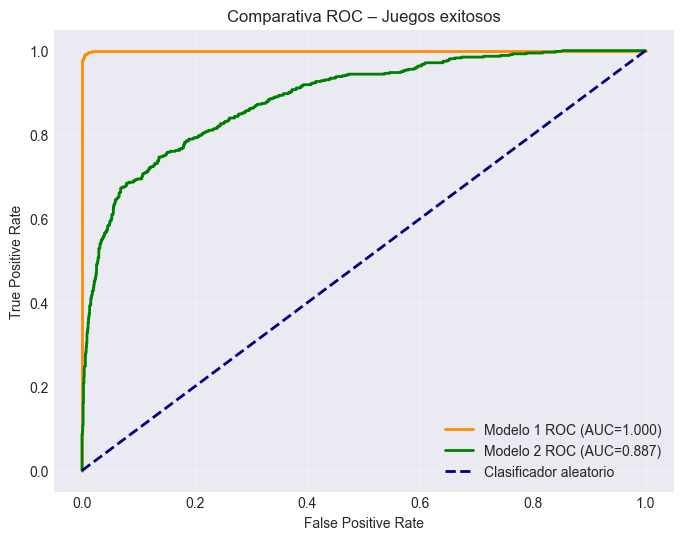

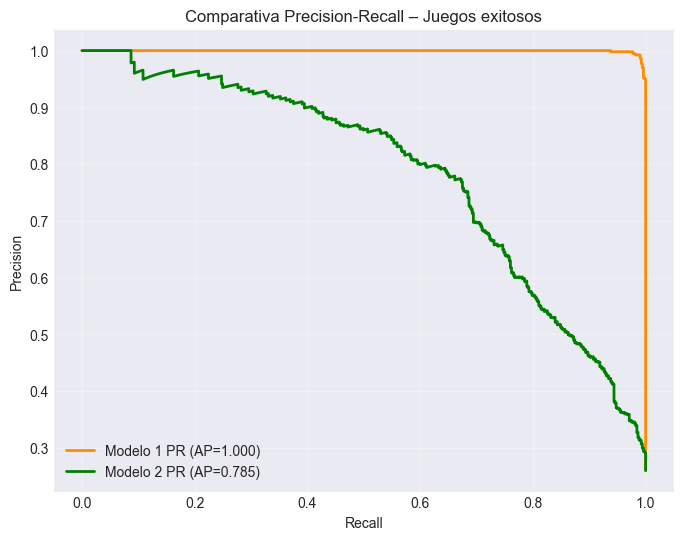

Umbral óptimo Modelo 1 (Youden Index): 0.554
Umbral óptimo Modelo 2 (Youden Index): 0.540


In [ ]:
# Definir etiquetas binarias (Hit vs No Hit)
threshold1 = y_train.quantile(0.75)
y_test_binary1 = (y_test >= threshold1).astype(int)

threshold2 = y2_train.quantile(0.75)
y_test_binary2 = (y2_test >= threshold2).astype(int)

# Calcular ROC y AUC
fpr1, tpr1, thr1 = roc_curve(y_test_binary1, y_pred)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, thr2 = roc_curve(y_test_binary2, y2_pred)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'Modelo 1 ROC (AUC={roc_auc1:.3f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Modelo 2 ROC (AUC={roc_auc2:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--', label='Clasificador aleatorio')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparativa ROC – Juegos exitosos')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Precision-Recall Curve
precision1, recall1, _ = precision_recall_curve(y_test_binary1, y_pred)
ap1 = average_precision_score(y_test_binary1, y_pred)

precision2, recall2, _ = precision_recall_curve(y_test_binary2, y2_pred)
ap2 = average_precision_score(y_test_binary2, y2_pred)

plt.figure(figsize=(8,6))
plt.plot(recall1, precision1, color='darkorange', lw=2, label=f'Modelo 1 PR (AP={ap1:.3f})')
plt.plot(recall2, precision2, color='green', lw=2, label=f'Modelo 2 PR (AP={ap2:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparativa Precision-Recall – Juegos exitosos')
plt.legend(loc='lower left')
plt.grid(alpha=0.3)
plt.show()

#  Umbral óptimo (Youden Index)
youden1 = tpr1 - fpr1
optimal_idx1 = np.argmax(youden1)
optimal_threshold1 = thr1[optimal_idx1]

youden2 = tpr2 - fpr2
optimal_idx2 = np.argmax(youden2)
optimal_threshold2 = thr2[optimal_idx2]

print(f"Umbral óptimo Modelo 1 (Youden Index): {optimal_threshold1:.3f}")
print(f"Umbral óptimo Modelo 2 (Youden Index): {optimal_threshold2:.3f}")

El análisis mediante curvas ROC y Precision-Recall muestra diferencias claras entre ambos modelos en la identificación de videojuegos exitosos. El Modelo 1 alcanza un rendimiento perfecto (AUC = 1 y AP = 1), lo cual es coherente con la inclusión de variables directamente relacionadas con las ventas globales. Por su parte, el Modelo 2 obtiene valores elevados (AUC = 0.887 y AP = 0.785), demostrando una buena capacidad discriminativa incluso en ausencia de información de ventas regionales. Estos resultados indican que, aunque el Modelo 2 presenta un rendimiento inferior, sigue siendo una herramienta útil para la detección temprana de videojuegos con alto potencial de éxito.

### 7. Visualización de resultados

Para complementar el análisis numérico de los modelos entrenados y facilitar la interpretación de los resultados obtenidos, vamos a generar diversos gráficos para evaluar el comportamiento del modelo 1 desde distintos puntos de vista. 

 FASE 3: VISUALIZACIONES DE RESULTADOS


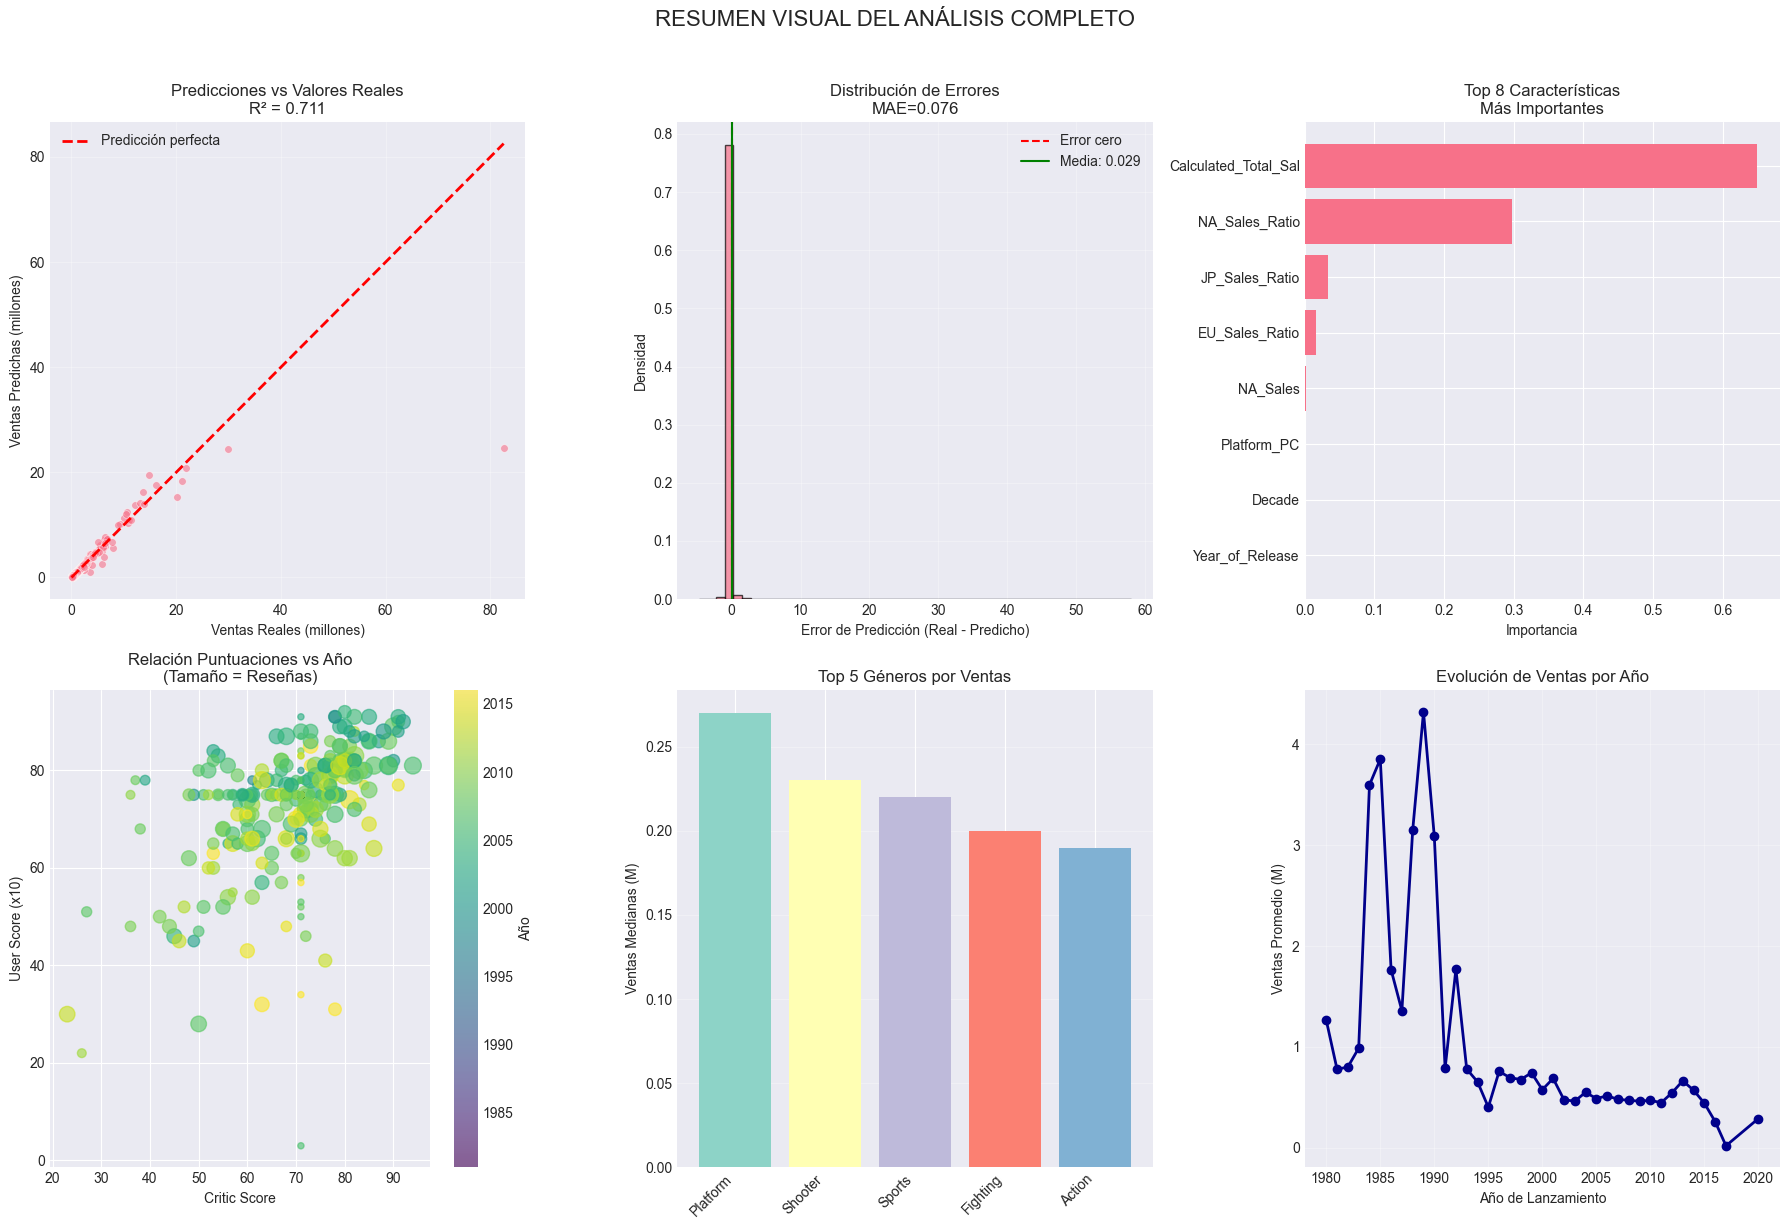

In [72]:
print(" FASE 3: VISUALIZACIONES DE RESULTADOS")
print("="*70)

fig = plt.figure(figsize=(18, 12))

# Predicciones vs Reales
ax1 = plt.subplot(2, 3, 1)
ax1.scatter(y_test, y_pred, alpha=0.6, s=30, edgecolors='w', linewidth=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción perfecta')
ax1.set_xlabel('Ventas Reales (millones)')
ax1.set_ylabel('Ventas Predichas (millones)')
ax1.set_title('Predicciones vs Valores Reales\nR² = {:.3f}'.format(r2))
ax1.legend()
ax1.grid(True, alpha=0.3)

# Distribución de errores
ax2 = plt.subplot(2, 3, 2)
errors = y_test - y_pred
ax2.hist(errors, bins=50, edgecolor='black', alpha=0.7, density=True)
ax2.axvline(x=0, color='r', linestyle='--', label='Error cero')
ax2.axvline(x=errors.mean(), color='g', linestyle='-', label=f'Media: {errors.mean():.3f}')
ax2.set_xlabel('Error de Predicción (Real - Predicho)')
ax2.set_ylabel('Densidad')
ax2.set_title(f'Distribución de Errores\nMAE={mae:.3f}')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Importancia de características
ax3 = plt.subplot(2, 3, 3)
top_n = 8
if 'feature_importance_df' in locals():
    top_features = feature_importance_df.head(top_n)
    ax3.barh(range(top_n), top_features['Importance'].values)
    ax3.set_yticks(range(top_n))
    ax3.set_yticklabels([f[:20] for f in top_features['Feature'].values])
else:
    top_indices = np.argsort(importances)[-top_n:][::-1]
    ax3.barh(range(top_n), importances[top_indices])
    ax3.set_yticks(range(top_n))
    ax3.set_yticklabels([f'Feature_{i}' for i in top_indices])
ax3.set_xlabel('Importancia')
ax3.set_title(f'Top {top_n} Características\nMás Importantes')
ax3.invert_yaxis()

# Gráfico de burbujas para relaciones clave
ax4 = plt.subplot(2, 3, 4)
sample_data = df_analysis.sample(min(500, len(df_analysis)), random_state=42)
sample_data = sample_data.dropna(subset=['Critic_Score', 'User_Score', 'Global_Sales'])
sample_data = sample_data[sample_data['Global_Sales'] < sample_data['Global_Sales'].quantile(0.95)]

sizes = np.sqrt(sample_data['Critic_Count'].fillna(1)) * 20
scatter = ax4.scatter(sample_data['Critic_Score'], 
                      sample_data['User_Score'] * 10,
                      s=sizes,
                      c=sample_data['Year_of_Release'],
                      cmap='viridis',
                      alpha=0.6)
ax4.set_xlabel('Critic Score')
ax4.set_ylabel('User Score (x10)')
ax4.set_title('Relación Puntuaciones vs Año\n(Tamaño = Reseñas)')
plt.colorbar(scatter, ax=ax4, label='Año')

# Comparación por género (top 5)
ax5 = plt.subplot(2, 3, 5)
top_genres = df_analysis.groupby('Genre')['Global_Sales'].median().sort_values(ascending=False).head(5).index
genre_data = df_analysis[df_analysis['Genre'].isin(top_genres)]
genre_medians = genre_data.groupby('Genre')['Global_Sales'].median().sort_values(ascending=False)

ax5.bar(range(len(genre_medians)), genre_medians.values, color=plt.cm.Set3(range(len(genre_medians))))
ax5.set_xticks(range(len(genre_medians)))
ax5.set_xticklabels(genre_medians.index, rotation=45, ha='right')
ax5.set_ylabel('Ventas Medianas (M)')
ax5.set_title('Top 5 Géneros por Ventas')
ax5.grid(True, alpha=0.3, axis='y')

# Evolución temporal
ax6 = plt.subplot(2, 3, 6)
if len(df_analysis) > 0 and 'Year_of_Release' in df_analysis.columns:
    yearly_avg = df_analysis.groupby('Year_of_Release')['Global_Sales'].mean().dropna()
    ax6.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2, color='darkblue')
    ax6.set_xlabel('Año de Lanzamiento')
    ax6.set_ylabel('Ventas Promedio (M)')
    ax6.set_title('Evolución de Ventas por Año')
    ax6.grid(True, alpha=0.3)

plt.suptitle('RESUMEN VISUAL DEL ANÁLISIS COMPLETO', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

#### 7.1 Predicciones frente a valores reales

El primer gráfico muestra la relación entre las ventas reales y las ventas predichas por el modelo. La línea diagonal representa el escenario ideal en que la predicción coincide exactamente con el valor real.

Podemos observar que una gran parte de los puntos se sitúan alrededor de la diagonal, especialmente en los rangos de venta bajos y medios, indicando un buen ajuste global del modelo y que este es capaz de capturar correctamente los patrones de los datos.

No obstante, también se pueden observar desviaciones más pronunciadas en videojuegos con ventas muy altas, donde el modelo tiende a perder precisión. El valor de R^2 siendo de 0,711 nos confirma que el modelo explica una proporción significativa de la variabilidad de las ventas globales.

#### 7.2 Distribución de errores de predicción

El segundo gráfico nos muestra la distribución de los errores de predicción, siendo estos la diferencia entre los valores reales y las ventas predichas. La distribución se observa claramente centrada alrededor del 0, lo que indica que el modelo no presenta un sesgo sistemático hacia la subestimación o la sobreestimación.

La mayoría de los errores se concentran en valores muy cercanos al 0, en consonancia con el MAE obtenido de 0,076. Sin embargo, la presencia  de colas más largas indica que hay un número pequeño de videojuegos con errores elevados.

#### 7.3 Importancia de las características

El análisis de la importancia de las características nos revela que el modelo basa gran parte de su capacidad predictiva en atributos relacionados con las ventas regionales.

En cambio, las variables temporales como el año de lanzamiento o la década, así como algún que otro atributo categórico, presentan una contribución mucho menor. Esto es coherente con el análisis exploratorio y confirma que el comportamiento del videojuego en los distintos mercados regionales es el factor más determinante para explicar las ventas globales.

#### 7.4 Relación entre puntuaciones, año de lanzamiento y reseñas

El diagrama de burbujas nos permite analizar a la vez las puntuaciones de la crítica y de los usuarios, dándonos información adicional mediante el tamaño de las burbujas (cuanto más grande es la burbuja, más reseñas tiene) y el color (año del lanzamiento).

Aquí podemos observar una relación moderada entre ambas puntuaciones, aunque con una dispersión considerable. Esto nos indica que, si bien los juegos bien valorados por la crítica son bien recibidos por los usuarios, esta relación no se traduce necesariamente en un mayor volumen de ventas. Además, los títulos más recientes suelen concentrarse puntuaciones medias-altas, sugiriendo una cierta homogeneización en las valoraciones a lo largo del tiempo.

#### 7.5 Comparación de ventas por género

El gráfico de barras muestra a mediana de ventas globales para los 5 géneros más vendidos del dataset. Los géneros Platform, Shooter y Sports destacan como los más exitosos en términos comerciales, seguidos por Fighting y Action.

Estos resultados indican una clara preferencia por los juegos centrados en la acción, la jugabilidad y la experiencia competitiva, y coinciden con los patrones observados durante el análisis exploratorio de los datos.

#### 7.6 Evolución temporal de las ventas

El último gráfico representa la evolución de las ventas medias en función del año de lanzamiento. Podemos observar picos significativos durante las décadas de los años 80 y 90, coincidiendo con las etapas de fuerte expansión del mercado de videojuegos.

En los años posteriores se observa una tendencia descendente y una posterior estabilización en valores más bajos, indicando la progresiva madurez de la industria y el aumento de la competencia entre títulos. Este contexto nos ayuda a explicar la mayor dificultad del modelo para predecir correctamente algunos atributos extremos en periodos concretos de tiempo.

#### 7.7 Conclusión de la visualización

Para concluir este apartado, podemos decir a ciencia cierta que las visualizaciones refuerzan y validan los resultados obtenidos en los anteriores apartados del análisis del dataset. El modelo 1 presenta un buen ajuste general, con errores moderados para la mayoría de los videojuegos y un comportamiento coherente con los patrones observados en los datos originales. Asimismo, los gráficos nos confirman la importancia de las ventas regionales y muestran las limitaciones del modelo en escenarios extremos.

### 8. Conclusiones

Después de realizar el análisis exploratorio del conjunto de datos, entrenar los modelos predictivos y evaluar sus resultados, se pueden extraer las siguientes conclusiones:
- Las ventas regionales son con mucha diferencia las variables que mejor explican las ventas globales de un videojuego. Esto se ha confirmado tanto mediante el análisis de correlaciones como a través del rendimiento del Modelo 1.
- El modelo 1, que incluye las ventas por región, obtiene un rendimiento claramente superior de R^2 = 0,71, lo que indica que es capaz de explicar una gran parte de la variabilidad de las ventas globales. Siendo este un resultado esperable debido al impacto de las ventas regionales en el modelo.
- El modelo 2, que excluye las ventas por región y utiliza solamente información disponible antes del lanzamiento, presenta un rendimiento mucho menor de R^2 = 0,39, demostrando que predecir el éxito comercial de un videojuego sin información de mercado es mucho más complejo.
- A pesar de su menor precisión, el modelo 2 resulta más realista en un escenario previo al lanzamiento, ya que se basa en variables que sí estarían disponibles en una fase temprana.
- Las puntuaciones de la crítica y de los usuarios muestran una correlación moderada entre sí, indicando que los juegos generalmente bien valorados por la crítica también suelen gustar al público. Sin embargo, estas variables tienen una relación más débil con las ventas, por lo que no garantiza el éxito comercial.
- El análisis de los atributos categóricos ha mostrado que existen claras diferencias en las ventas según la plataforma, el género y el rating, aunque algunas categorías muestran muy pocas observaciones, lo que puede llegar a distorsionar las medias y debe tenerse en cuenta al interpretar los resultados.
- Aplicar la validación cruzada a ambos modelos nos ha servido para ver que los resultados son consistentes y estables, especialmente en el modelo 1, lo que indica que el modelo no depende excesivamente de una partición concreta del conjunto de datos.
- En conclusión, este trabajo nos indica que, aunque los modelos de aprendizaje automático pueden capturar patrones relevantes en los datos, la predicción precisa del éxito comercial de un videojuego sigue estando fuertemente condicionada por factores de mercado, especialmente las ventas regionales.  